- spec (Python 3.11.4)

In [1]:
# load libraries for data processing

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import chemometrics as cm
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from chemometrics.mcr import McrAR
import chemometrics.mcr.constraint as constraint
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.extmath import randomized_svd
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")
df_list = [pd.read_excel(file) for file in mat_files]
df = pd.concat(df_list, ignore_index=False, axis = 1, join = "outer")
# import data into dict
data = {}
for file in mat_files:
    data[file.split("/")[-1].replace(".xlsx","").replace('NIR_Gachon_amaranth\\Gachon_','')] = pd.read_excel(file, index_col=0)


info = {'Experiment': df.columns[1:]}
infodf = pd.DataFrame(info)

infodf['Group'] = infodf.Experiment.str.split("_").str[0]
labels = infodf['Group']
le = LabelEncoder().fit_transform(labels)
colors = [plt.cm.jet(float(i)/max(le)) for i in le]
infodf["Colors"] = colors 

wl = pd.Series(df["Cm-1"].to_numpy().ravel(order="K"), name="ref")

def plot_raw_spec

In [121]:
def plot_raw_spec(data, infodf):
    r"""
    Plot lines colored by position or `reference`

    Generate a line plot with `x` on x-axis and one or multiple dataseries
    `Y`. The lines are either colored by position in the matrix `Y` or by
    value in the `reference` matrix.
    
    * data[key].iloc[:,i].name  i.e. 'E46_res32_001_230428_104059.0002'

    Parameters
    ----------
    data : dictionary
            key : excel file name, value : pd.dataframe of NIR absorbance
    infodf : pandas dataframe
            columns : ['Experiment', 'Group', 'Colors']
            Experiment = each excel sheet column i.e. 'E46_res32_001_230428_104059.0002'
            Group = Extract or Original i.e. E46
            Colors(Reference values to color data series by) = 
                i.e. (0.2751423149905123, 1.0, 0.6925996204933587, 1.0)
    Y : (n, m) ndarray
        Matrix containing data series to plot. The function expects. `n`
        datapoints in `m` series.
    ax : {None, (n,) ndarray}
        Location on x-axis

    Returns
    -------
    dictionary
    lines : list
        A list of line objects generated by plotting the spectra.
    """
    lines = []
    error_lines = []
    for key in data.keys():
        Y = data[key].values
        ax = data[key].index
        idf = infodf[infodf['Experiment'].isin(data[key].columns)]
        if len(idf) > 0 : 
            for i in range(len(idf["Experiment"])):
                try: 
                    cols = idf[idf['Experiment']==data[key].iloc[:,i].name]["Colors"].values[0]
                    line_i = plt.plot(ax, Y[:,i], c=cols, alpha=0.5)
                    lines.append(line_i[0])
                except IndexError:
                    error_lines.append("%s_%s"%(key,i))
                    print("IndexError",key,i)

        else :
            continue
            print(np.array(error_lines))
    
    rawD = {'plot' : lines, 'error' : error_lines, }
    return lines




IndexError 230519 0
IndexError 230519 1
IndexError 230519 2
IndexError 230519 3
IndexError 230519 4
IndexError 230519 5
IndexError 230519 6
IndexError 230519 7
IndexError 230519 8
IndexError 230519 9
IndexError 230519 10
IndexError 230519 11


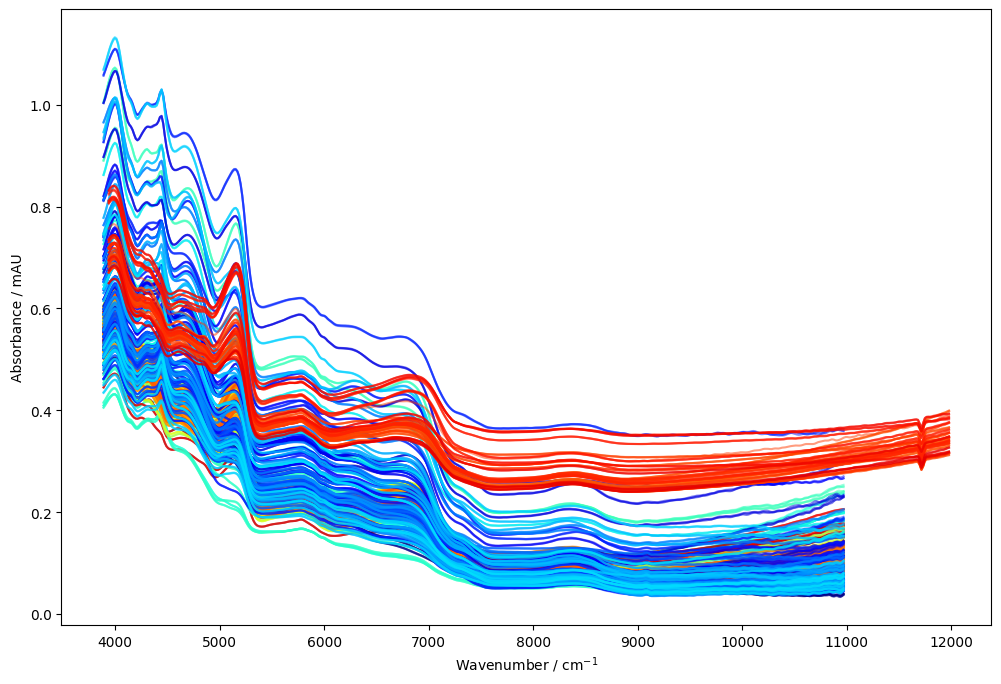

In [122]:
fig = plt.figure(figsize=(12, 8))
lines = plot_raw_spec(data=data, infodf=infodf)
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.show()


In [5]:
# remove duplicate
ud = []
[ud.append(x) for x in infodf["Group"] if x not in ud ]
ud


['E46',
 'E47',
 'O46',
 'O47',
 'Cm-1',
 'E22',
 'E24',
 'E26',
 'E38',
 'E444',
 'E62',
 'E855',
 'E875',
 'E946',
 'O22',
 'O24',
 'O26',
 'O38',
 'O444',
 'O62',
 'O855',
 'O875',
 'O946',
 'O441',
 'O483',
 'O496',
 'O497',
 'O498',
 'S441',
 'S483',
 'S496',
 'S497',
 'S498',
 'Etoh',
 'Water',
 '땅심이E2',
 '땅심이E3',
 '땅심이E4',
 '땅심이E5',
 'NR Brain',
 'NR Eyes',
 'NR Gallbladder',
 'NR Gill',
 'NR Heart',
 'NR Intestine',
 'NR Kidney',
 'NR Liver',
 'NR Muscle',
 'NR Ovary',
 'NR Pyloric caeca',
 'NR Skin',
 'NR Stomach',
 'NR Testis',
 '땅심이 O2',
 '땅심이 O3',
 '땅심이 O4',
 '땅심이 O5',
 'Black Bird E2',
 'Black Bird E3',
 'Black Bird E4',
 'Black Bird E5',
 'Black Bird O2',
 'Black Bird O3',
 'Black Bird O4',
 'Black Bird O5',
 'CG Brain',
 'CG Eyes',
 'CG Gill',
 'CG Heart',
 'CG Intestine',
 'CG Liver',
 'CG Muscle',
 'CG Ovary',
 'CG Pyloric caeca',
 'CG Skin',
 'CG Stomach',
 'CG Testis',
 'E441',
 'E483',
 'E496',
 'E497',
 'E498',
 'E13',
 'E14',
 'E16',
 'E19',
 'E23',
 'E25',
 'E4',

In [86]:
import re
rm_word = ['Cm-1', '땅심이', 'NR','CG','S','Water', 'Etoh']

'''for grp in infodf["Group"]:
    if grp in rm_word:
        rm_list.append(grp)
'''
rm_list = []
for grp in infodf["Group"]:
    for word in rm_word:
        if re.search(word, grp):
            # print(grp)
            rm_list.append(grp)
mod_info = infodf[~infodf['Group'].isin(rm_list)]

infodf[~infodf['Group'].isin(rm_list)]["Group"].values

# for check
# mod_info[mod_info['Experiment'].isin([r'O[1-5]_230519'])]
# [len(re.findall('O[1-5]_230519', exp)) > 0 for exp in mod_info['Experiment']]
# for exp in mod_info['Experiment']:
#     if re.search('땅심이 O[1-5]_230519', exp) != None :
#          print(exp) 
# len(re.findall('O[1-5]_230519', '땅심이 O2_230519_212526.0000')) > 0

In [159]:
data.keys()
ll = list(set(mod_info["Experiment"]))
ll = ["_".join(line.split("_")[0:-1]) for line in ll]
ll = list(set(ll))
ll
df1 = pd.DataFrame({"Analysis":ll})
df1.to_csv('Amaranth_colname.csv')
len(lines)


771

Whitakker
- 날짜별
- E vs O

IndexError 230519 0
IndexError 230519 1
IndexError 230519 2
IndexError 230519 3
IndexError 230519 4
IndexError 230519 5
IndexError 230519 6
IndexError 230519 7
IndexError 230519 8
IndexError 230519 9
IndexError 230519 10
IndexError 230519 11


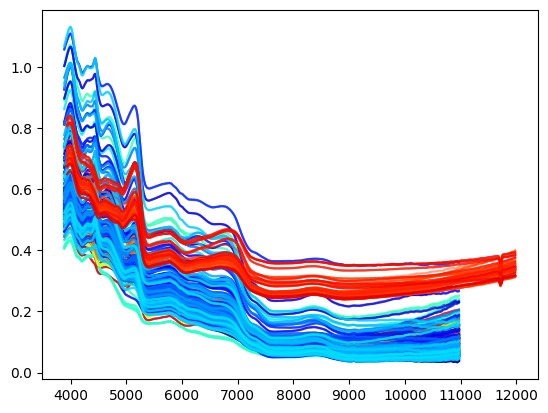

In [118]:
# test
lines = []
error_lines = []
for key in data.keys():
    
    Y = data[key].values
    ax = data[key].index
    idf = infodf[infodf['Experiment'].isin(data[key].columns)]
    # print(key, len(idf))
    if len(idf) > 0 : 
        for i in range(len(idf["Experiment"])):
            try: 
                cols = idf[idf['Experiment']==data[key].iloc[:,i].name]["Colors"].values[0]
                line_i = plt.plot(ax, Y[:,i], c=cols, alpha=0.5)
                lines.append(line_i[0])
            except IndexError:
                error_lines.append("%s_%s"%(key,i))
                print("IndexError",key,i)

    else :
        continue

IndexError 230519 0
IndexError 230519 1
IndexError 230519 2
IndexError 230519 3
IndexError 230519 4
IndexError 230519 5
IndexError 230519 6
IndexError 230519 7
IndexError 230519 8
IndexError 230519 9
IndexError 230519 10
IndexError 230519 11


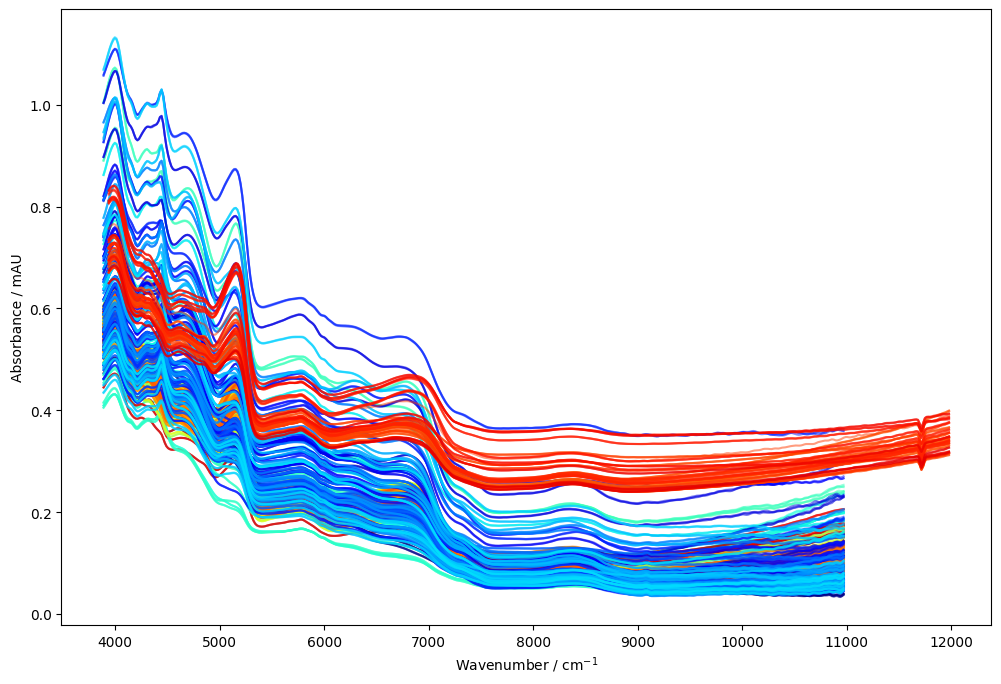

In [131]:
fig = plt.figure(figsize=(12, 8))
lines = plot_raw_spec(data=data, infodf=mod_info)
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')
plt.show()
